In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Customer-Churn-Prediction.csv') #import data set 

In [3]:
df2 = df.copy()

In [4]:
df3 = df.copy()

In [5]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

C:\Users\Study Mart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

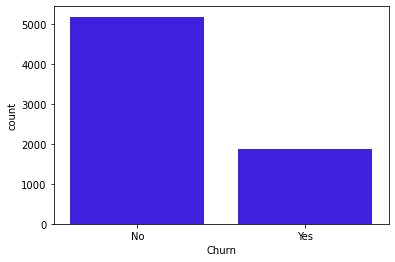

In [9]:
sns.countplot(df['Churn'],color='#2B00FF')

In [10]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(7043, 21)

# Basic Visualization using Seaborn Library

<AxesSubplot:xlabel='count', ylabel='gender'>

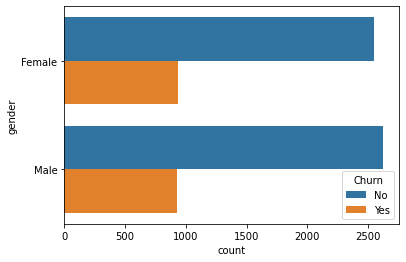

In [12]:
sns.countplot(y = 'gender', hue='Churn', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

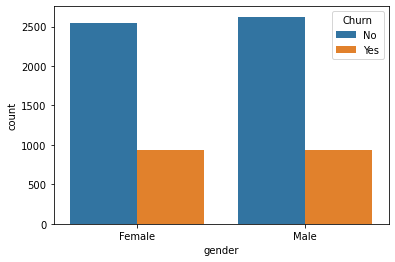

In [13]:
sns.countplot(x = 'gender', hue='Churn', data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

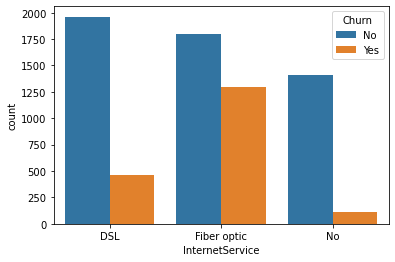

In [14]:
sns.countplot(x = 'InternetService', hue='Churn', data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

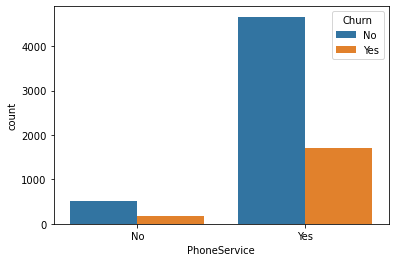

In [15]:
sns.countplot(x = 'PhoneService',hue='Churn', data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

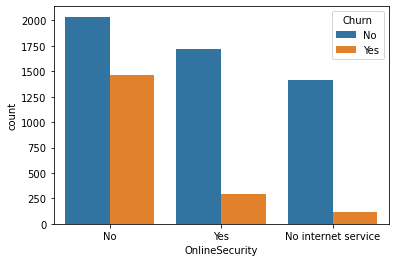

In [16]:
sns.countplot(x = 'OnlineSecurity',hue='Churn', data=df)

In [17]:
df['OnlineSecurity'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
df['OnlineSecurity'].value_counts() 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

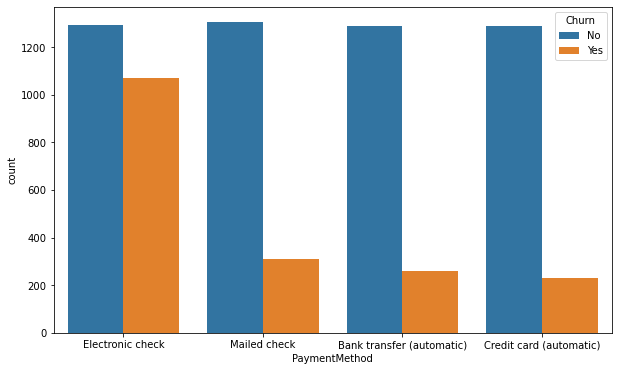

In [19]:
plt.subplots(figsize=(10,6)) 
sns.countplot(x = 'PaymentMethod',hue='Churn', data=df) 

# Preprocess the dataset

In [20]:
#Drop Customer id
df = df.drop('customerID', axis=1)

In [21]:
df.shape

(7043, 20)

# Encode the data set

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label = LabelEncoder()

In [24]:
from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# seperate x, y

In [26]:
x = df.drop('Churn',axis=1) #separate dependent and independent variable
y = df['Churn']

In [27]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [28]:
x.shape

(7043, 19)

In [29]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [30]:
y.shape

(7043,)

# Imbalanced Data Handling 

In [31]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [32]:
churned = (5174/(5174+1869)) * 100
not_churned = (1869/(5174+1869)) * 100

In [33]:
print('Not churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not churned 26.536987079369588 percent of total people
Churned 73.4630129206304 percent of total people


In [34]:
churn_no = df[df['Churn']==0]
churn_yes = df[df['Churn']==1]

In [35]:
churn_no.shape

(5174, 20)

In [36]:
churn_yes.shape

(1869, 20)

# Synthetic Minority Oversampling Technique (SMOTETomek)

In [37]:
# !pip install imblearn

In [38]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html

In [39]:
from imblearn.combine import SMOTETomek

In [40]:
sm = SMOTETomek(random_state=42)

In [41]:
X,Y = sm.fit_resample(x,y)

In [42]:
X.shape

(9612, 19)

In [43]:
Y.shape

(9612,)

In [44]:
Y.value_counts()

0    4806
1    4806
Name: Churn, dtype: int64

In [45]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


# Near Miss for Under_Sampling

In [46]:
from imblearn.under_sampling import NearMiss

In [47]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html

NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)


In [48]:
new_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.90,1624
1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,5454
2,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
3,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
4,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,5651
3734,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,3448
3735,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,5776
3736,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,5431


In [49]:
new_x.shape

(3738, 19)

In [50]:
new_y

0       0
1       0
2       0
3       0
4       0
       ..
3733    1
3734    1
3735    1
3736    1
3737    1
Name: Churn, Length: 3738, dtype: int32

In [51]:
new_y.shape

(3738,)

In [52]:
3738/2

1869.0

In [53]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [54]:
new_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

# Over Sampling

In [55]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
df2.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [57]:
from imblearn.over_sampling import RandomOverSampler

In [58]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

over = RandomOverSampler(random_state=100)


In [59]:
x_new , y_new = over.fit_resample(x,y)

In [60]:
x_new.shape

(10348, 19)

In [61]:
y_new.shape

(10348,)

In [62]:
y_new.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Cross Validation

# Hold Out Cross Validation

In [63]:
from sklearn.model_selection import train_test_split 

In [64]:
xtrain,xtest, ytrain,ytest = train_test_split(x, y, train_size=.75,random_state=42) 

In [65]:
xtrain.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6607,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153
2598,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396
2345,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211
4093,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850
693,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350


In [66]:
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,2044
2715,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25,6522
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,67
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35,5822
132,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55,2837


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
Clf = DecisionTreeClassifier() 

In [69]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [70]:
Clf.score(xtest,ytest)

0.7382169222032936

# XGBoost Classifier

In [71]:
!pip install xgboost

In [72]:
import xgboost 
from xgboost import XGBClassifier

In [73]:
xgb = XGBClassifier()

In [74]:
xgb.fit(xtrain,ytrain)

C:\Users\Study Mart\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
xgb.score(xtest,ytest)

0.7910278250993753

# Ada Boost

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
ada = AdaBoostClassifier()

In [78]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [79]:
ada.score(xtest,ytest)

0.797274275979557

# Cross Validation

# K Fold Cross Validation

In [80]:
from sklearn.model_selection import KFold, cross_val_score

In [81]:
kfold = KFold(n_splits=5) #each fold contain 20% data

In [82]:
result = cross_val_score(ada,x,y,cv=kfold) 

In [83]:
result

array([0.8105039 , 0.80766501, 0.79630944, 0.79261364, 0.80184659])

In [84]:
result.max()

0.8105039034776437

In [85]:
result.min()

0.7926136363636364

In [86]:
result.mean()

0.801787716142977

# Stratified k fold cross Validation

In [87]:
from sklearn.model_selection import StratifiedKFold

In [88]:
st = StratifiedKFold(n_splits=4)

In [89]:
score2 = cross_val_score(Clf,x,y,cv=st)

In [90]:
score2

array([0.72402044, 0.73537763, 0.70471323, 0.74147727])

In [91]:
score2.max()

0.7414772727272727

In [92]:
score2.min()

0.7047132311186826

In [93]:
score2.mean()

0.7263971432811935

# Leave One Out Cross Validation

In [94]:
from sklearn.model_selection import LeaveOneOut

In [95]:
le = LeaveOneOut()

In [ ]:
result3 = cross_val_score(ada,x,y,cv=le)

In [ ]:
result3

In [ ]:
result3.mean()